# import modules

In [1]:
import sys

sys.path.insert(0, "../")

from modules.Classes_ver0 import *
from modules.default_params_ver0 import *
from modules.functions_ver0 import *

# define PrecessingTaman

In [50]:
class PrecessingTaman(Precessing):
    def __init__(self, params):
        super().__init__(params)

    ### get the delta phi_P
    def integrand_delta_phi(self, y, f):
        """integrand for delta phi p (equations in Apostolatos 1994, and appendix of Evangelos in prep)
        """
        LdotN = self.LdotN(f)
        cos_i_JN, sin_i_JN, cos_o_XH, sin_o_XH = self.precession_angles()
        f_dot = self.f_dot(f)
        
        Omega_LJ = 1000 * self.omega_tilde * (f / self.f_cut())**(5/3) / (self.total_mass()/self.SOLMASS2SEC)
                
        integrand_delta_phi = (LdotN / (1 - LdotN**2)) * Omega_LJ * np.sin(self.theta_LJ(f)) * ( np.cos(self.theta_LJ(f)) * sin_i_JN * np.sin(self.phi_LJ(f)) - np.sin(self.theta_LJ(f)) * cos_i_JN ) / f_dot
        
        #if self.theta_tilde == 0:
            #integrand_delta_phi = - Omega_LJ
            
        if cos_i_JN == 1:
            integrand_delta_phi = - Omega_LJ * np.cos(self.theta_LJ(f)) / f_dot
        
        #if LdotN == 1:
            #integrand_delta_phi = 0

        return integrand_delta_phi

# define plotting functions

In [15]:
# # plot contour of mismatch between RP & L as a function of omega_tilde and theta_tilde

# def mismatch_contour_P(l_params, rp_params, np_params, cmd, lens_Class=LensingGeo, prec_Class=Precessing):
#     n_pts = 20
#     theta_tilde_mesh = np.linspace(0, 8, n_pts)
#     omega_tilde_mesh = np.linspace(0, 3, n_pts)
#     X, Y = np.meshgrid(theta_tilde_mesh, omega_tilde_mesh)
#     Z = np.zeros_like(X)

#     for r in range(n_pts):
#         for c in range(n_pts):
#             rp_params["theta_tilde"] = theta_tilde_mesh[c]
#             rp_params["omega_tilde"] = omega_tilde_mesh[r]

#             ep_min, g_min, ep_max, g_max, ep_0 = mismatch_epsilon_min_max(
#                 l_params, rp_params, np_params, cmd, lens_Class, prec_Class
#             )
#             Z[r, c] = ep_min

#     # print coordinates where mismatch is min
#     min_idx = np.unravel_index(np.argmin(Z, axis=None), Z.shape)
#     print("min mismatch = {:.3g}".format(Z[min_idx]))
#     print("min theta_tilde = {:.3g}".format(theta_tilde_mesh[min_idx[1]]))
#     print("min omega_tilde = {:.3g}".format(omega_tilde_mesh[min_idx[0]]))
    
#     # print coordinates where mismatch is max
#     max_idx = np.unravel_index(np.argmax(Z, axis=None), Z.shape)
#     print("max mismatch = {:.3g}".format(Z[max_idx]))
#     print("max theta_tilde = {:.3g}".format(theta_tilde_mesh[max_idx[1]]))
#     print("max omega_tilde = {:.3g}".format(omega_tilde_mesh[max_idx[0]]))

#     plt.contourf(X, Y, Z, levels=30, cmap="jet")
#     plt.xlabel(r"$\tilde{\theta}$")
#     plt.ylabel(r"$\tilde{\Omega}$")
#     plt.colorbar(label=r"$\epsilon(\~h_{\rm P}, \~h_{\rm L})$", cmap="jet", norm=colors.Normalize(vmin=0, vmax=1))
#     plt.title(
#         r"$\theta_L$ = {:.3g}, $\phi_L$ = {:.3g}, $\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, {} = {:.3g}, {} = {:.3g}".format(
#             l_params["theta_L"],
#             l_params["phi_L"],
#             l_params["theta_S"],
#             l_params["phi_S"],
#             r"$y$",
#             l_params["y"],
#             r"$M_{Lz}$",
#             l_params["MLz"] / solar_mass,
#         )
#     )

In [2]:
# plot contour of mismatch between RP & L as a function of omega_tilde and theta_tilde

def mismatch_contour_P(l_params, rp_params, np_params, cmd, lens_Class=LensingGeo, prec_Class=Precessing):
    n_pts = 20
    theta_tilde_arr = np.linspace(0, 8, n_pts)
    omega_tilde_arr = np.linspace(0, 3, n_pts)
    X, Y = np.meshgrid(theta_tilde_arr, omega_tilde_arr)
    Z = np.zeros_like(X)

    for r in range(n_pts):
        for c in range(n_pts):
            rp_params["theta_tilde"] = X[r, c]
            rp_params["omega_tilde"] = Y[r, c]
            
            ep_min, g_min, ep_max, g_max, ep_0 = mismatch_epsilon_min_max(
                l_params, rp_params, np_params, cmd, lens_Class, prec_Class
            )
            Z[r, c] = ep_min

    # print coordinates where mismatch is min
    min_idx = np.unravel_index(np.argmin(Z, axis=None), Z.shape)
    print("min mismatch = {:.3g}".format(Z[min_idx]))
    print("min theta_tilde = {:.3g}".format(X[min_idx]))
    print("min omega_tilde = {:.3g}".format(Y[min_idx]))
    
    # print coordinates where mismatch is max
    max_idx = np.unravel_index(np.argmax(Z, axis=None), Z.shape)
    print("max mismatch = {:.3g}".format(Z[max_idx]))
    print("max theta_tilde = {:.3g}".format(X[max_idx]))
    print("max omega_tilde = {:.3g}".format(Y[max_idx]))

    plt.contourf(X, Y, Z, levels=30, cmap="jet")
    plt.xlabel(r"$\tilde{\theta}$")
    plt.ylabel(r"$\tilde{\Omega}$")
    plt.colorbar(label=r"$\epsilon(\~h_{\rm P}, \~h_{\rm L})$", cmap="jet", norm=colors.Normalize(vmin=0, vmax=1))
    plt.title(
        r"$\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}, $\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}".format(
            rp_params["theta_J"],
            rp_params["phi_J"],
            rp_params["theta_S"],
            rp_params["phi_S"],
        )
    )

In [3]:
# make a function to plot mismatch between fixed RP & L as a function of theta_J and phi_J

def mismatch_contour_J(l_params, rp_params, np_params, cmd, lens_Class=LensingGeo, prec_Class=Precessing):
    n_pts = 20
    phi_J_arr = np.linspace(0, 2*np.pi, n_pts)
    theta_J_arr = np.linspace(0, np.pi, n_pts)
    X, Y = np.meshgrid(phi_J_arr, theta_J_arr)
    Z = np.zeros_like(X)

    for r in range(n_pts):
        for c in range(n_pts):
            rp_params["phi_J"] = l_params["phi_J"] = X[r, c]
            rp_params["theta_J"] = l_params["theta_J"] = Y[r, c]
            
            ep_min, g_min, ep_max, g_max, ep_0 = mismatch_epsilon_min_max(
                l_params, rp_params, np_params, cmd, lens_Class, prec_Class
            )
            Z[r, c] = ep_min

    # print coordinates where mismatch is min
    min_idx = np.unravel_index(np.argmin(Z, axis=None), Z.shape)
    print("min mismatch = {:.3g}".format(Z[min_idx]))
    print("min phi_J = {:.3g}".format(X[min_idx]))
    print("min theta_J = {:.3g}".format(Y[min_idx]))

    # print coordinates where mismatch is max
    max_idx = np.unravel_index(np.argmax(Z, axis=None), Z.shape)
    print("max mismatch = {:.3g}".format(Z[max_idx]))
    print("max phi_J = {:.3g}".format(X[max_idx]))
    print("max theta_J = {:.3g}".format(Y[max_idx]))

    plt.contourf(X, np.cos(Y), Z, levels=30, cmap="jet")
    plt.xlabel(r"$\phi_J$")
    plt.xticks(np.arange(0, 2*np.pi + np.pi/4, np.pi/4), [r'$0$', r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$', r'$\frac{3\pi}{4}$', r'$\pi$', r'$\frac{5\pi}{4}$', r'$\frac{3\pi}{2}$', r'$\frac{7\pi}{4}$', r'$2\pi$'])
    plt.ylabel(r'$\cos \theta_J$')
    plt.colorbar(label=r"$\epsilon(\~h_{\rm P}, \~h_{\rm L})$", cmap="jet", norm=colors.Normalize(vmin=0, vmax=1))
    plt.title(
        r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, {} = {:.3g}, {} = {:.3g}".format(
            rp_params["theta_S"],
            rp_params["phi_S"],
            r"$\~{\theta}$",
            rp_params["theta_tilde"],
            r"$\~{\Omega}$",
            rp_params["omega_tilde"],
        )
    )

# mismatch between RP & L with L fixed

## face-on

inclination_cosine = 1.0


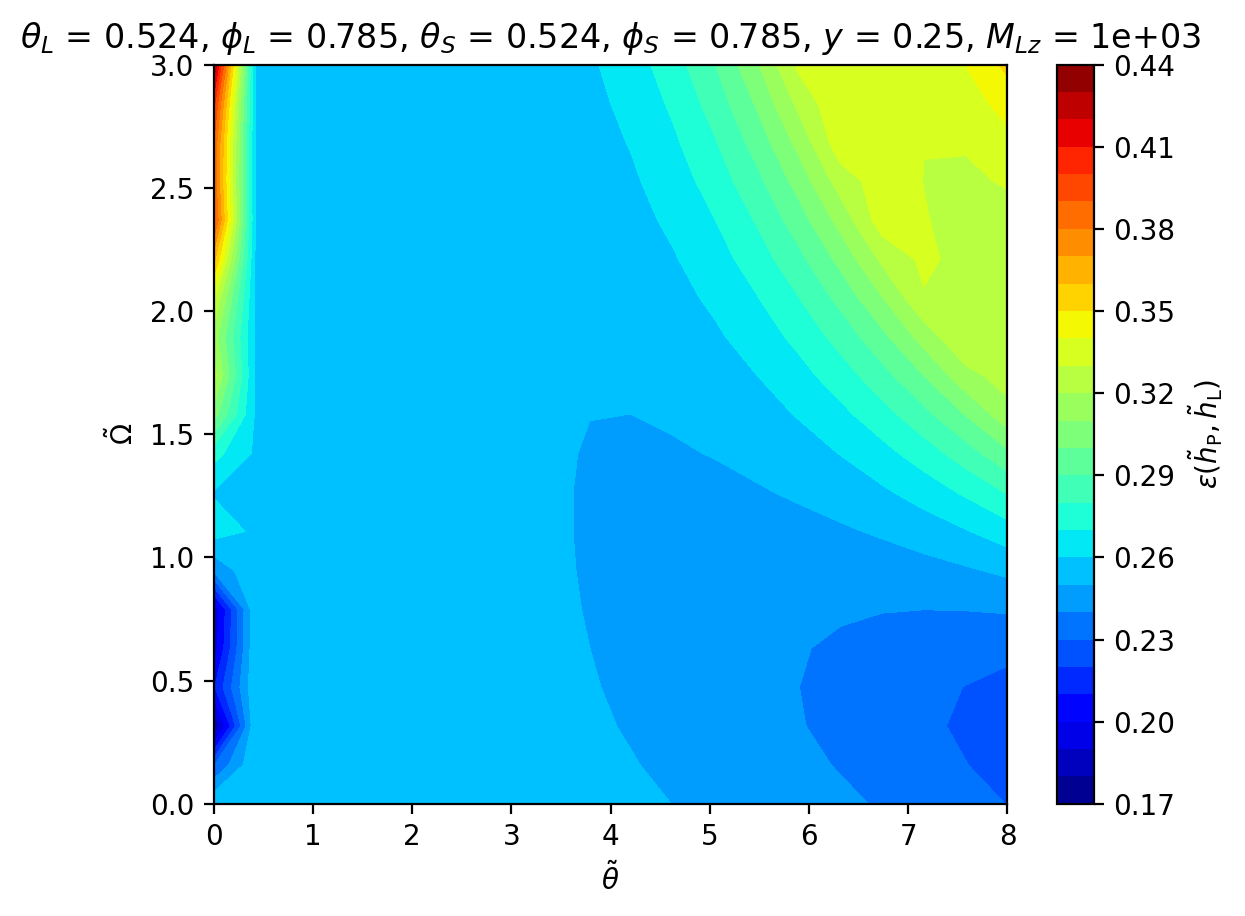

In [33]:
lensing_params, RP_params, NP_params = set_to_params(lensing_params_0, RP_params_0, NP_params_0)

# using Saif's choice of sky locations, set sky location to face-on
theta_J, phi_J = sky_locs_J_S[0]
theta_S, phi_S = sky_locs_S_S[0]
print("inclination cosine = {:.3g}".format(cos_i_JN(phi_J, theta_J, phi_S, theta_S)))

# set lensed & RP to same location
lensing_params['theta_L'] = RP_params['theta_J'] = theta_J
lensing_params['phi_L'] = RP_params['phi_J'] = phi_J
lensing_params['theta_S'] = RP_params['theta_S'] = theta_S
lensing_params['phi_S'] = RP_params['phi_S'] = phi_S

# set mcz for both lensed and RP
mcz = 20
lensing_params['mcz'] = RP_params['mcz'] = mcz * solar_mass

mismatch_contour_P(lensing_params, RP_params, NP_params, "L & RP", Lensing, Precessing) # type: ignore

order of arguments: phi_J, theta_J, phi_S, theta_S
inclination cosine = 1
min mismatch = 0.235
min theta_tilde = 8
min omega_tilde = 0.474
max mismatch = 0.362
max theta_tilde = 8
max omega_tilde = 3


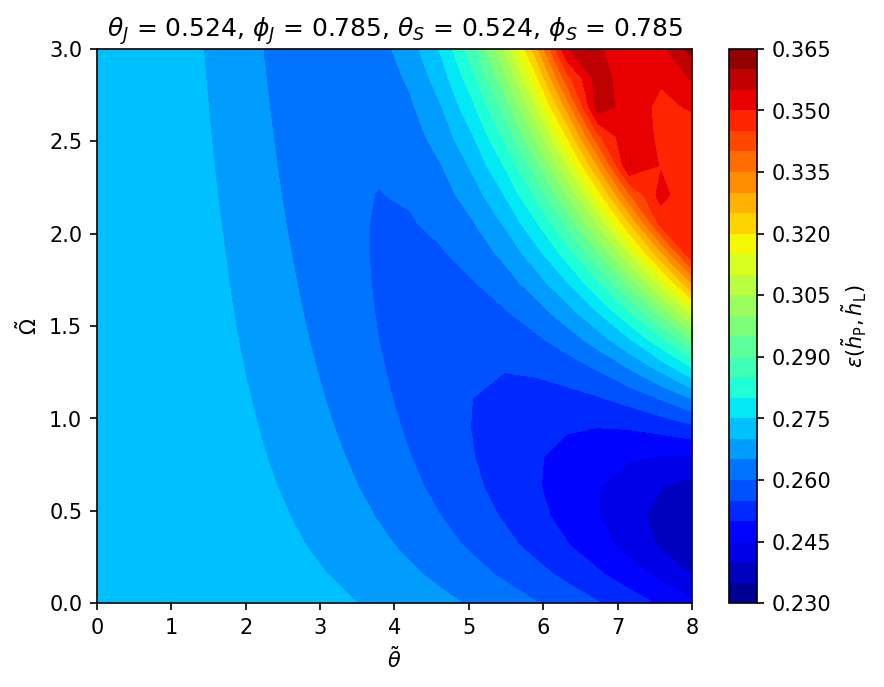

In [7]:
lensing_params, RP_params, NP_params = set_to_params(lensing_params_0, RP_params_0, NP_params_0)

# using Saif's choice of sky locations, set sky location to face-on
theta_J, phi_J = sky_locs_J_S[0]
theta_S, phi_S = sky_locs_S_S[0]
print("inclination cosine = {:.3g}".format(cos_i_JN(phi_J, theta_J, phi_S, theta_S)))

# set lensed, RP, NP to same location
lensing_params['theta_L'] = RP_params['theta_J'] = NP_params['theta_J'] = theta_J
lensing_params['phi_L'] = RP_params['phi_J'] = NP_params['phi_J'] = phi_J
lensing_params['theta_S'] = RP_params['theta_S'] = NP_params['theta_S'] = theta_S
lensing_params['phi_S'] = RP_params['phi_S'] = NP_params['phi_S'] = phi_S

# set mcz for both lensed and RP
mcz = 20
lensing_params['mcz'] = RP_params['mcz'] = NP_params['mcz'] = mcz * solar_mass

mismatch_contour_P(lensing_params, RP_params, NP_params, "L & RP")

order of arguments: phi_J, theta_J, phi_S, theta_S
inclination cosine = 1
min mismatch = 0.00533
min theta_tilde = 8
min omega_tilde = 3
max mismatch = 0.0865
max theta_tilde = 5.05
max omega_tilde = 2.68


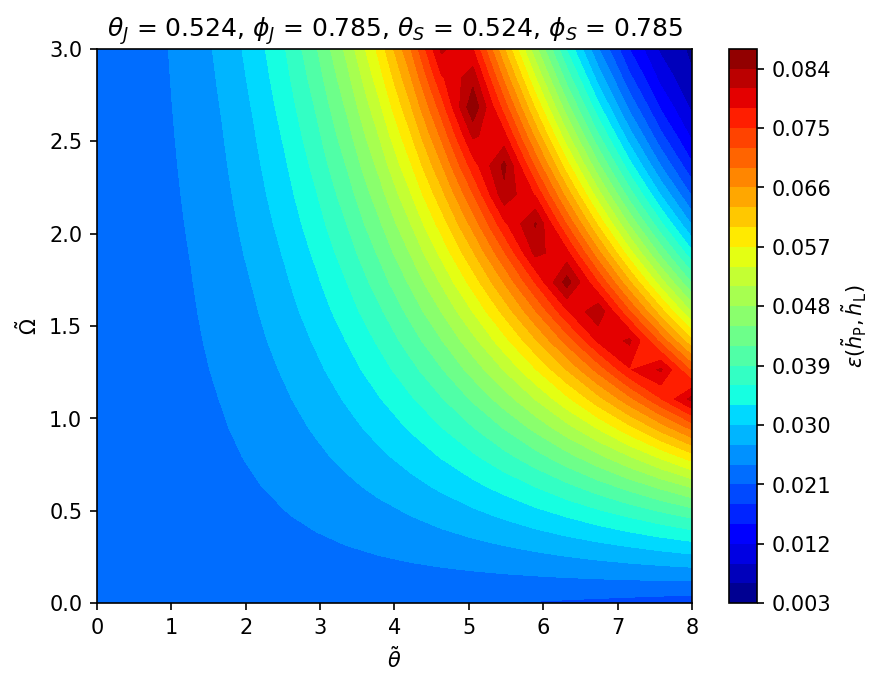

In [29]:
lensing_params, RP_params, NP_params = set_to_params(lensing_params_0, RP_params_0, NP_params_0)

# using Saif's choice of sky locations, set sky location to face-on
theta_J, phi_J = sky_locs_J_S[0]
theta_S, phi_S = sky_locs_S_S[0]
print("inclination cosine = {:.3g}".format(cos_i_JN(phi_J, theta_J, phi_S, theta_S)))

# set lensed, RP, NP to same location
lensing_params['theta_L'] = RP_params['theta_J'] = NP_params['theta_J'] = theta_J
lensing_params['phi_L'] = RP_params['phi_J'] = NP_params['phi_J'] = phi_J
lensing_params['theta_S'] = RP_params['theta_S'] = NP_params['theta_S'] = theta_S
lensing_params['phi_S'] = RP_params['phi_S'] = NP_params['phi_S'] = phi_S

# set mcz for both lensed and RP
mcz = 40
lensing_params['mcz'] = RP_params['mcz'] = NP_params['mcz'] = mcz * solar_mass

mismatch_contour_P(lensing_params, RP_params, NP_params, "L & RP")

order of arguments: phi_J, theta_J, phi_S, theta_S
inclination cosine = 1
min mismatch = 0.00851
min theta_tilde = 8
min omega_tilde = 0
max mismatch = 0.0878
max theta_tilde = 6.74
max omega_tilde = 2.68


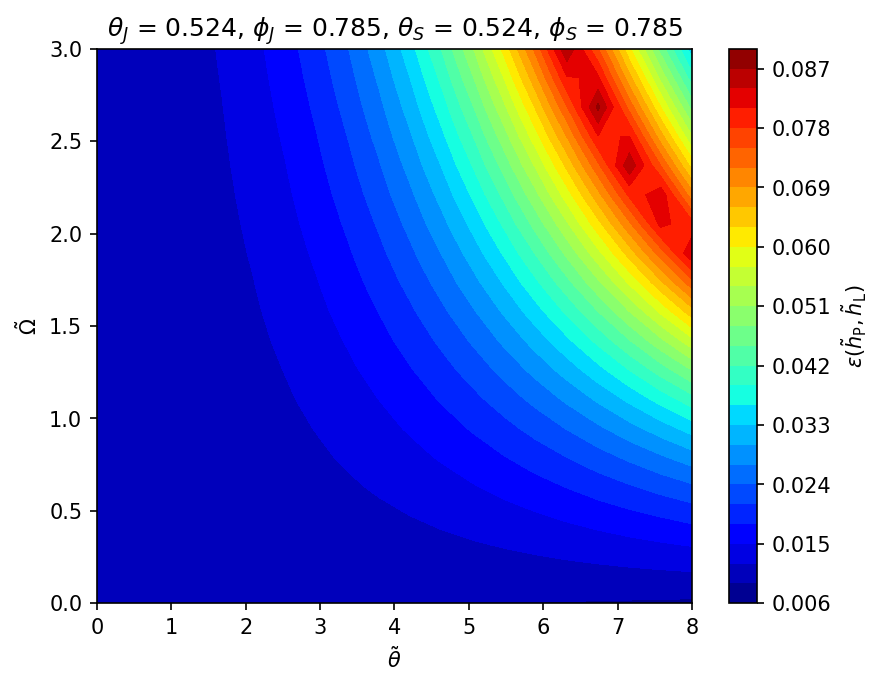

In [36]:
lensing_params, RP_params, NP_params = set_to_params(lensing_params_0, RP_params_0, NP_params_0)

# using Saif's choice of sky locations, set sky location to face-on
theta_J, phi_J = sky_locs_J_S[0]
theta_S, phi_S = sky_locs_S_S[0]
print("inclination cosine = {:.3g}".format(cos_i_JN(phi_J, theta_J, phi_S, theta_S)))

# set lensed, RP, NP to same location
lensing_params['theta_L'] = RP_params['theta_J'] = NP_params['theta_J'] = theta_J
lensing_params['phi_L'] = RP_params['phi_J'] = NP_params['phi_J'] = phi_J
lensing_params['theta_S'] = RP_params['theta_S'] = NP_params['theta_S'] = theta_S
lensing_params['phi_S'] = RP_params['phi_S'] = NP_params['phi_S'] = phi_S

# set mcz for both lensed and RP
mcz = 50
lensing_params['mcz'] = RP_params['mcz'] = NP_params['mcz'] = mcz * solar_mass

mismatch_contour_P(lensing_params, RP_params, NP_params, "L & RP")

order of arguments: phi_J, theta_J, phi_S, theta_S
inclination cosine = 1
min mismatch = 0.235
min theta_tilde = 8
min omega_tilde = 0.474
max mismatch = 0.362
max theta_tilde = 8
max omega_tilde = 3


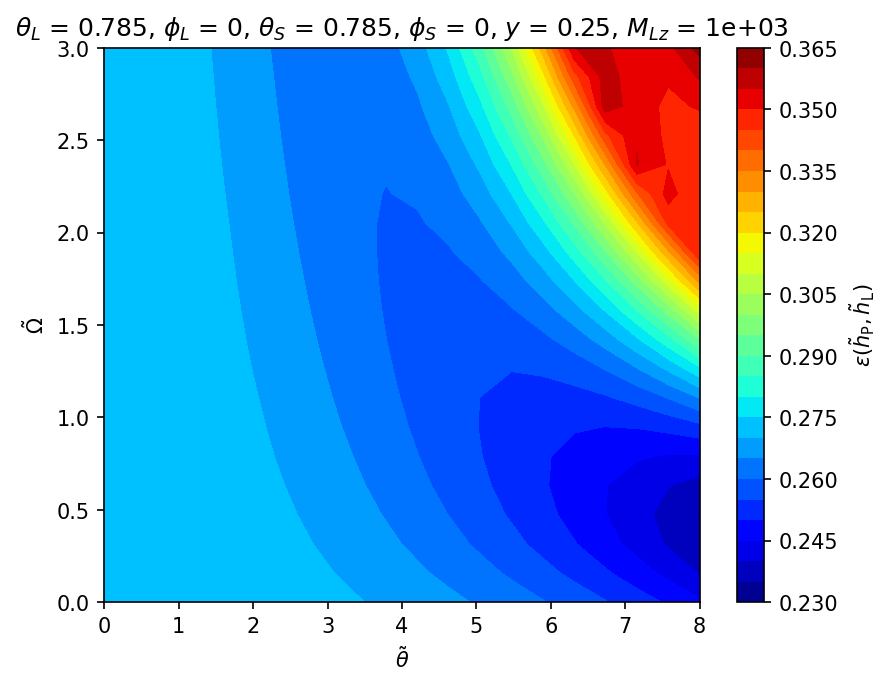

In [10]:
lensing_params, RP_params, NP_params = set_to_params(lensing_params_0, RP_params_0, NP_params_0)

# using Evangelos's choice of sky locations, set sky location to face-on
theta_J, phi_J = sky_locs_J_E[0]
theta_S, phi_S = sky_locs_S_E[0]
print("inclination cosine = {:.3g}".format(cos_i_JN(phi_J, theta_J, phi_S, theta_S)))

# set lensed, RP, NP to same location
lensing_params['theta_L'] = RP_params['theta_J'] = NP_params['theta_J'] = theta_J
lensing_params['phi_L'] = RP_params['phi_J'] = NP_params['phi_J'] = phi_J
lensing_params['theta_S'] = RP_params['theta_S'] = NP_params['theta_S'] = theta_S
lensing_params['phi_S'] = RP_params['phi_S'] = NP_params['phi_S'] = phi_S

# set mcz for both lensed and RP
mcz = 20
lensing_params['mcz'] = RP_params['mcz'] = NP_params['mcz'] = mcz * solar_mass

mismatch_contour_P(lensing_params, RP_params, NP_params, "L & RP")

## edge-on

order of arguments: phi_J, theta_J, phi_S, theta_S
inclination cosine = 1.11e-16


/Users/fairytien/Google Drive (fairynguyen33@gmail.com)/TEXAS Bridge Program 2023-2024/code/Tien's/Classes_and_functions.py:396: RuntimeWarning: divide by zero encountered in divide
  tan_psi = num_psi / den_psi


min mismatch = 0.0193
min theta_tilde = 2.11
min omega_tilde = 1.26
max mismatch = 0.338
max theta_tilde = 5.05
max omega_tilde = 3


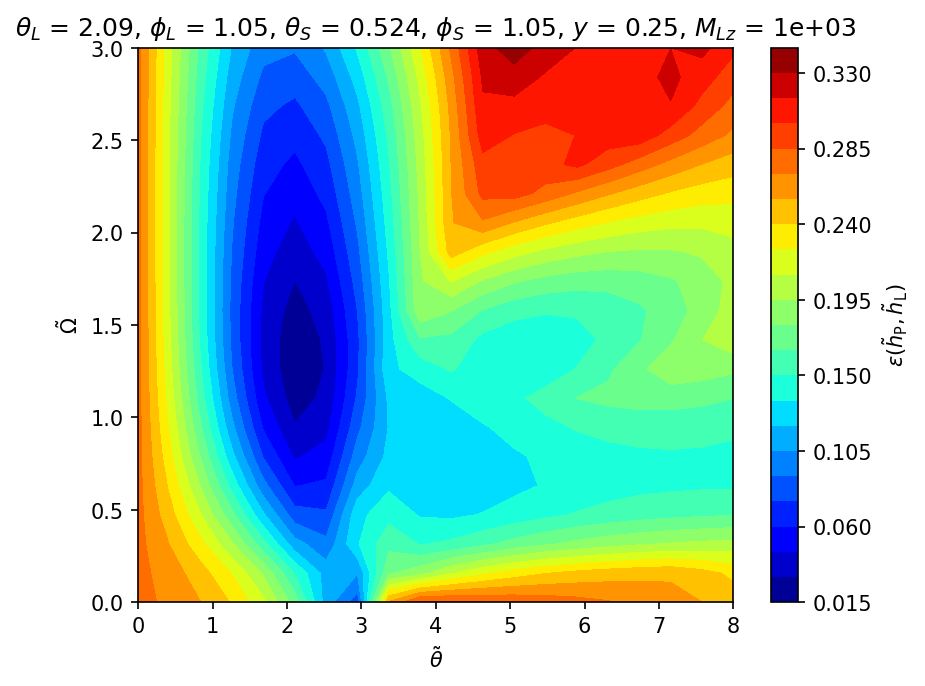

In [11]:
lensing_params, RP_params, NP_params = set_to_params(lensing_params_0, RP_params_0, NP_params_0)

# using Saif's choice of sky locations, set sky location to edge-on
theta_J, phi_J = sky_locs_J_S[1]
theta_S, phi_S = sky_locs_S_S[1]
print("inclination cosine = {:.3g}".format(cos_i_JN(phi_J, theta_J, phi_S, theta_S)))

# set lensed, RP, NP to same location
lensing_params['theta_L'] = RP_params['theta_J'] = NP_params['theta_J'] = theta_J
lensing_params['phi_L'] = RP_params['phi_J'] = NP_params['phi_J'] = phi_J
lensing_params['theta_S'] = RP_params['theta_S'] = NP_params['theta_S'] = theta_S
lensing_params['phi_S'] = RP_params['phi_S'] = NP_params['phi_S'] = phi_S

# set mcz for both lensed and RP
mcz = 20
lensing_params['mcz'] = RP_params['mcz'] = NP_params['mcz'] = mcz * solar_mass

mismatch_contour_P(lensing_params, RP_params, NP_params, "L & RP")

order of arguments: phi_J, theta_J, phi_S, theta_S
inclination cosine = 1.11e-16
min mismatch = 0.000317
min theta_tilde = 2.95
min omega_tilde = 1.11
max mismatch = 0.0595
max theta_tilde = 4.21
max omega_tilde = 3


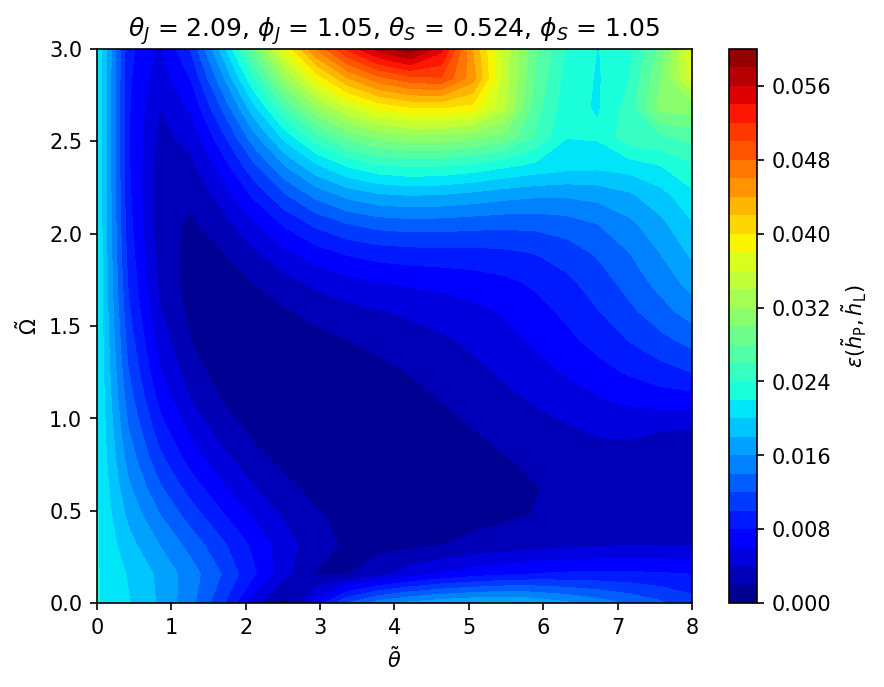

In [30]:
lensing_params, RP_params, NP_params = set_to_params(lensing_params_0, RP_params_0, NP_params_0)

# using Saif's choice of sky locations, set sky location to edge-on
theta_J, phi_J = sky_locs_J_S[1]
theta_S, phi_S = sky_locs_S_S[1]
print("inclination cosine = {:.3g}".format(cos_i_JN(phi_J, theta_J, phi_S, theta_S)))

# set lensed, RP, NP to same location
lensing_params['theta_L'] = RP_params['theta_J'] = NP_params['theta_J'] = theta_J
lensing_params['phi_L'] = RP_params['phi_J'] = NP_params['phi_J'] = phi_J
lensing_params['theta_S'] = RP_params['theta_S'] = NP_params['theta_S'] = theta_S
lensing_params['phi_S'] = RP_params['phi_S'] = NP_params['phi_S'] = phi_S

# set mcz for both lensed and RP
mcz = 40
lensing_params['mcz'] = RP_params['mcz'] = NP_params['mcz'] = mcz * solar_mass

mismatch_contour_P(lensing_params, RP_params, NP_params, "L & RP")

order of arguments: phi_J, theta_J, phi_S, theta_S
inclination cosine = 1.11e-16


/Users/fairytien/Google Drive (fairynguyen33@gmail.com)/TEXAS Bridge Program 2023-2024/code/Tien's/Classes_and_functions.py:396: RuntimeWarning: divide by zero encountered in divide
  tan_psi = num_psi / den_psi


min mismatch = 6.02e-05
min theta_tilde = 3.37
min omega_tilde = 0.947
max mismatch = 0.0205
max theta_tilde = 8
max omega_tilde = 3


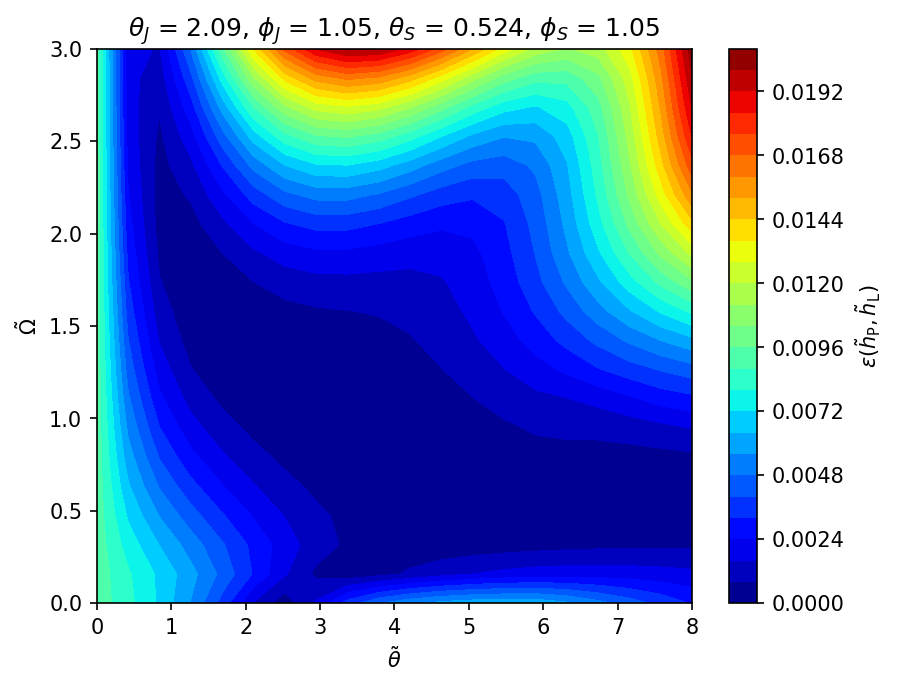

In [46]:
lensing_params, RP_params, NP_params = set_to_params(lensing_params_0, RP_params_0, NP_params_0)

# using Saif's choice of sky locations, set sky location to edge-on
theta_J, phi_J = sky_locs_J_S[1]
theta_S, phi_S = sky_locs_S_S[1]
print("inclination cosine = {:.3g}".format(cos_i_JN(phi_J, theta_J, phi_S, theta_S)))

# set lensed, RP, NP to same location
lensing_params['theta_L'] = RP_params['theta_J'] = NP_params['theta_J'] = theta_J
lensing_params['phi_L'] = RP_params['phi_J'] = NP_params['phi_J'] = phi_J
lensing_params['theta_S'] = RP_params['theta_S'] = NP_params['theta_S'] = theta_S
lensing_params['phi_S'] = RP_params['phi_S'] = NP_params['phi_S'] = phi_S

# set mcz for both lensed and RP
mcz = 50
lensing_params['mcz'] = RP_params['mcz'] = NP_params['mcz'] = mcz * solar_mass

mismatch_contour_P(lensing_params, RP_params, NP_params, "L & RP")

order of arguments: phi_J, theta_J, phi_S, theta_S
inclination cosine = 8.66e-17
min mismatch = 0.0355
min theta_tilde = 7.16
min omega_tilde = 0.632
max mismatch = 0.331
max theta_tilde = 8
max omega_tilde = 3


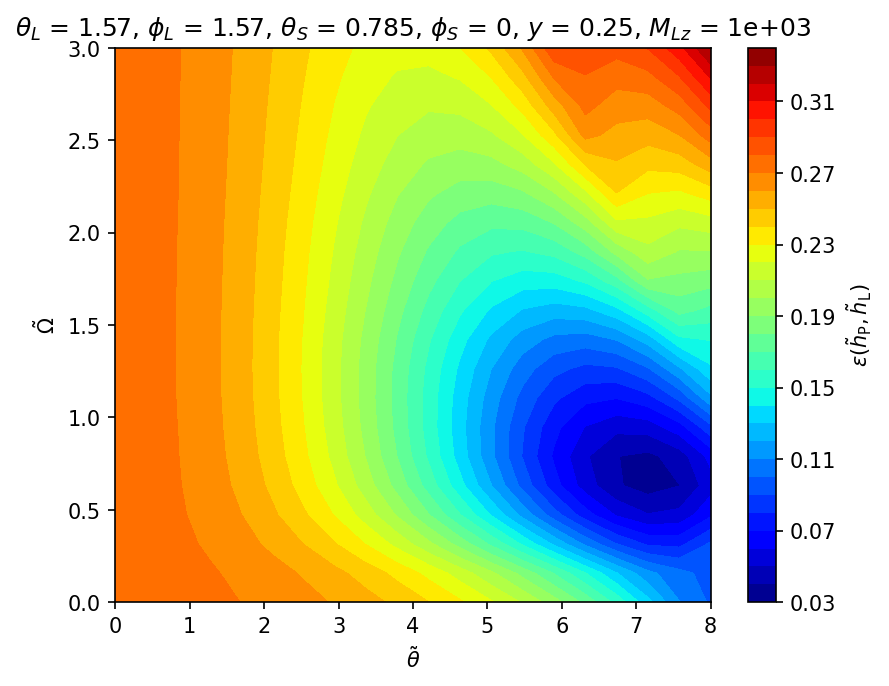

In [12]:
lensing_params, RP_params, NP_params = set_to_params(lensing_params_0, RP_params_0, NP_params_0)

# using Evangelos's choice of sky locations, set sky location to edge-on
theta_J, phi_J = sky_locs_J_E[1]
theta_S, phi_S = sky_locs_S_E[1]
print("inclination cosine = {:.3g}".format(cos_i_JN(phi_J, theta_J, phi_S, theta_S)))

# set lensed, RP, NP to same location
lensing_params['theta_L'] = RP_params['theta_J'] = NP_params['theta_J'] = theta_J
lensing_params['phi_L'] = RP_params['phi_J'] = NP_params['phi_J'] = phi_J
lensing_params['theta_S'] = RP_params['theta_S'] = NP_params['theta_S'] = theta_S
lensing_params['phi_S'] = RP_params['phi_S'] = NP_params['phi_S'] = phi_S

# set mcz for both lensed and RP
mcz = 20
lensing_params['mcz'] = RP_params['mcz'] = NP_params['mcz'] = mcz * solar_mass

mismatch_contour_P(lensing_params, RP_params, NP_params, "L & RP")

## random

order of arguments: phi_J, theta_J, phi_S, theta_S
inclination cosine = 0.5


min mismatch = 0.023
min theta_tilde = 4.21
min omega_tilde = 1.42
max mismatch = 0.275
max theta_tilde = 0
max omega_tilde = 0


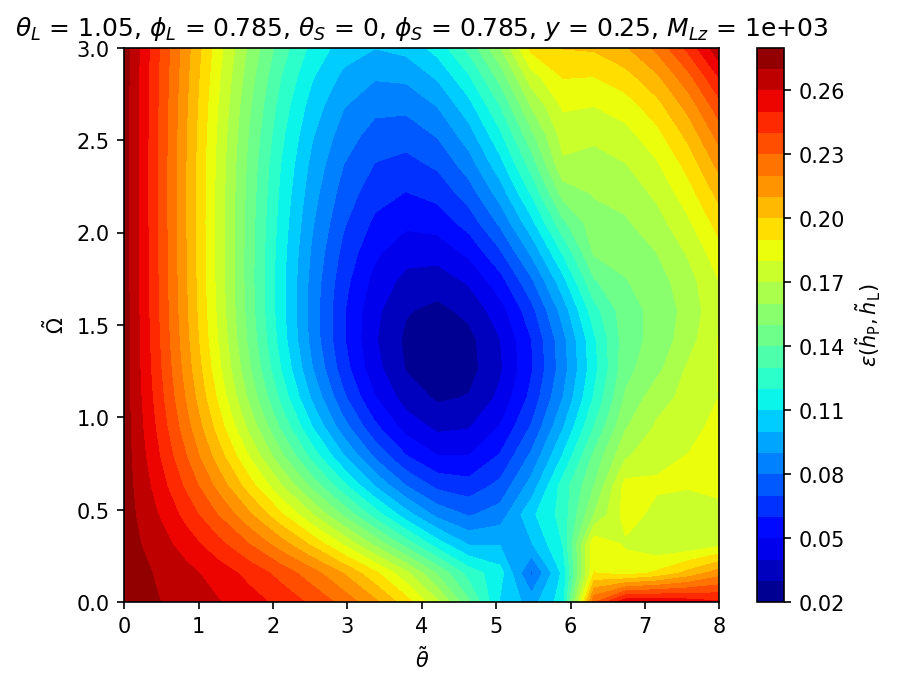

In [13]:
lensing_params, RP_params, NP_params = set_to_params(lensing_params_0, RP_params_0, NP_params_0)

# using Saif's choice of sky locations, set sky location to random
theta_J, phi_J = sky_locs_J_S[2]
theta_S, phi_S = sky_locs_S_S[2]
print("inclination cosine = {:.3g}".format(cos_i_JN(phi_J, theta_J, phi_S, theta_S)))

# set lensed, RP, NP to same location
lensing_params['theta_L'] = RP_params['theta_J'] = NP_params['theta_J'] = theta_J
lensing_params['phi_L'] = RP_params['phi_J'] = NP_params['phi_J'] = phi_J
lensing_params['theta_S'] = RP_params['theta_S'] = NP_params['theta_S'] = theta_S
lensing_params['phi_S'] = RP_params['phi_S'] = NP_params['phi_S'] = phi_S

# set mcz for both lensed and RP
mcz = 20
lensing_params['mcz'] = RP_params['mcz'] = NP_params['mcz'] = mcz * solar_mass

mismatch_contour_P(lensing_params, RP_params, NP_params, "L & RP")

order of arguments: phi_J, theta_J, phi_S, theta_S
inclination cosine = 0.5
min mismatch = 0.000365
min theta_tilde = 8
min omega_tilde = 0.789
max mismatch = 0.029
max theta_tilde = 8
max omega_tilde = 3


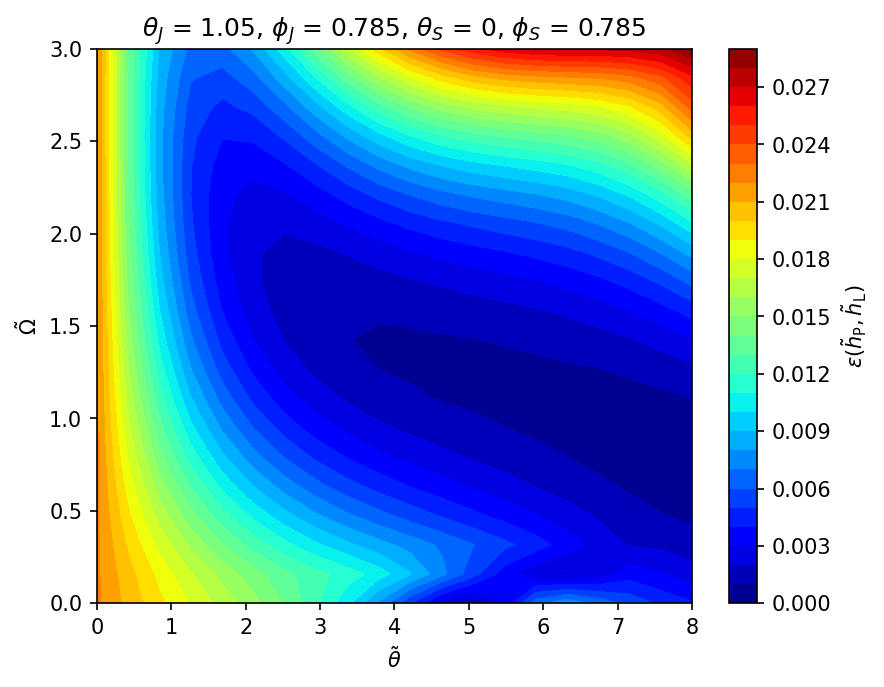

In [31]:
lensing_params, RP_params, NP_params = set_to_params(lensing_params_0, RP_params_0, NP_params_0)

# using Saif's choice of sky locations, set sky location to random
theta_J, phi_J = sky_locs_J_S[2]
theta_S, phi_S = sky_locs_S_S[2]
print("inclination cosine = {:.3g}".format(cos_i_JN(phi_J, theta_J, phi_S, theta_S)))

# set lensed, RP, NP to same location
lensing_params['theta_L'] = RP_params['theta_J'] = NP_params['theta_J'] = theta_J
lensing_params['phi_L'] = RP_params['phi_J'] = NP_params['phi_J'] = phi_J
lensing_params['theta_S'] = RP_params['theta_S'] = NP_params['theta_S'] = theta_S
lensing_params['phi_S'] = RP_params['phi_S'] = NP_params['phi_S'] = phi_S

# set mcz for both lensed and RP
mcz = 40
lensing_params['mcz'] = RP_params['mcz'] = NP_params['mcz'] = mcz * solar_mass

mismatch_contour_P(lensing_params, RP_params, NP_params, "L & RP")

order of arguments: phi_J, theta_J, phi_S, theta_S
inclination cosine = 0.5
min mismatch = 2.91e-05
min theta_tilde = 6.74
min omega_tilde = 0.789
max mismatch = 0.0132
max theta_tilde = 8
max omega_tilde = 3


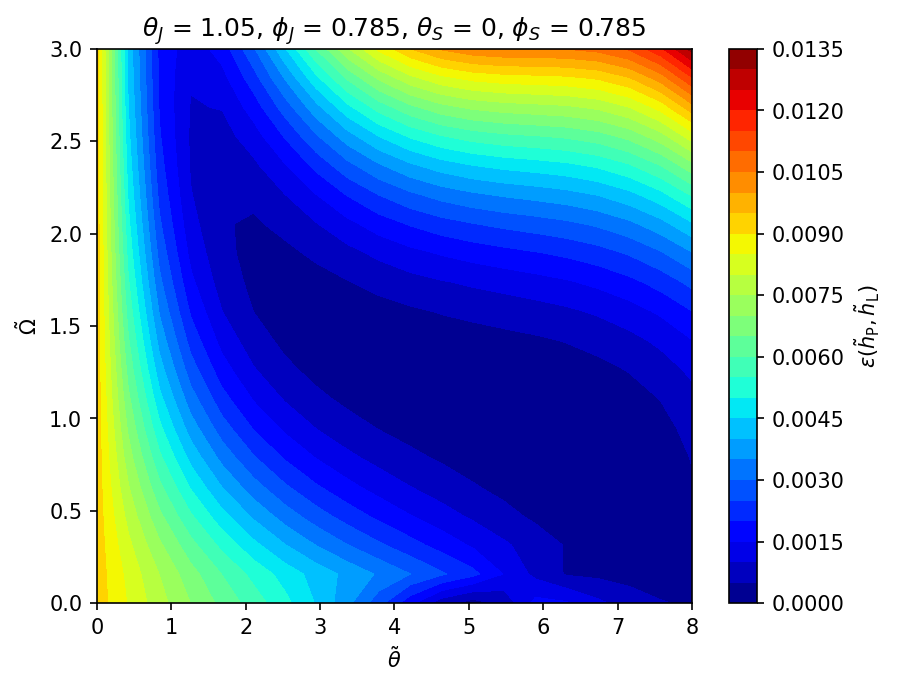

In [47]:
lensing_params, RP_params, NP_params = set_to_params(lensing_params_0, RP_params_0, NP_params_0)

# using Saif's choice of sky locations, set sky location to random
theta_J, phi_J = sky_locs_J_S[2]
theta_S, phi_S = sky_locs_S_S[2]
print("inclination cosine = {:.3g}".format(cos_i_JN(phi_J, theta_J, phi_S, theta_S)))

# set lensed, RP, NP to same location
lensing_params['theta_L'] = RP_params['theta_J'] = NP_params['theta_J'] = theta_J
lensing_params['phi_L'] = RP_params['phi_J'] = NP_params['phi_J'] = phi_J
lensing_params['theta_S'] = RP_params['theta_S'] = NP_params['theta_S'] = theta_S
lensing_params['phi_S'] = RP_params['phi_S'] = NP_params['phi_S'] = phi_S

# set mcz for both lensed and RP
mcz = 50
lensing_params['mcz'] = RP_params['mcz'] = NP_params['mcz'] = mcz * solar_mass

mismatch_contour_P(lensing_params, RP_params, NP_params, "L & RP")

order of arguments: phi_J, theta_J, phi_S, theta_S
inclination cosine = -0.493
min mismatch = 0.0243
min theta_tilde = 5.89
min omega_tilde = 1.11
max mismatch = 0.275
max theta_tilde = 0
max omega_tilde = 0


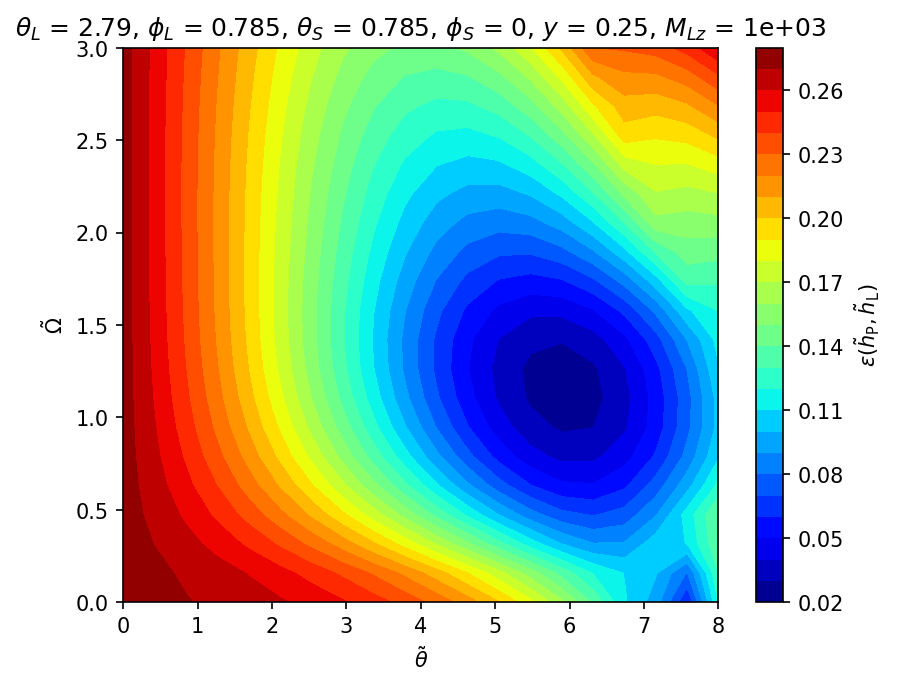

In [14]:
lensing_params, RP_params, NP_params = set_to_params(lensing_params_0, RP_params_0, NP_params_0)

# using Evangelos's choice of sky locations, set sky location to random
theta_J, phi_J = sky_locs_J_E[2]
theta_S, phi_S = sky_locs_S_E[2]
print("inclination cosine = {:.3g}".format(cos_i_JN(phi_J, theta_J, phi_S, theta_S)))

# set lensed, RP, NP to same location
lensing_params['theta_L'] = RP_params['theta_J'] = NP_params['theta_J'] = theta_J
lensing_params['phi_L'] = RP_params['phi_J'] = NP_params['phi_J'] = phi_J
lensing_params['theta_S'] = RP_params['theta_S'] = NP_params['theta_S'] = theta_S
lensing_params['phi_S'] = RP_params['phi_S'] = NP_params['phi_S'] = phi_S

# set mcz for both lensed and RP
mcz = 20
lensing_params['mcz'] = RP_params['mcz'] = NP_params['mcz'] = mcz * solar_mass

mismatch_contour_P(lensing_params, RP_params, NP_params, "L & RP")

# mismatch between RP & NP with NP fixed

## face-on

In [51]:
lensing_params, RP_params, NP_params = set_to_params(lensing_params_0, RP_params_0, NP_params_0)

# using Saif's choice of sky locations, set sky location to face-on
theta_J, phi_J = sky_locs_J_S[0]
theta_S, phi_S = sky_locs_S_S[0]
print("inclination cosine = {:.3g}".format(cos_i_JN(phi_J, theta_J, phi_S, theta_S)))

# set lensed, RP, NP to same location
lensing_params['theta_L'] = RP_params['theta_J'] = NP_params['theta_J'] = theta_J
lensing_params['phi_L'] = RP_params['phi_J'] = NP_params['phi_J'] = phi_J
lensing_params['theta_S'] = RP_params['theta_S'] = NP_params['theta_S'] = theta_S
lensing_params['phi_S'] = RP_params['phi_S'] = NP_params['phi_S'] = phi_S

# set mcz for both lensed and RP
mcz = 20
lensing_params['mcz'] = RP_params['mcz'] = NP_params['mcz'] = mcz * solar_mass

mismatch_contour_P(lensing_params, RP_params, NP_params, "RP & NP", LensingGeo, PrecessingTaman) # type: ignore

order of arguments: phi_J, theta_J, phi_S, theta_S
inclination cosine = 1


/var/folders/y_/v4l1jv1j5b55928djlvnhnm40000gp/T/ipykernel_828/2142403003.py:15: RuntimeWarning: divide by zero encountered in scalar divide
  integrand_delta_phi = (LdotN / (1 - LdotN**2)) * Omega_LJ * np.sin(self.theta_LJ(f)) * ( np.cos(self.theta_LJ(f)) * sin_i_JN * np.sin(self.phi_LJ(f)) - np.sin(self.theta_LJ(f)) * cos_i_JN ) / f_dot


FloatingPointError: invalid value encountered in scalar multiply

order of arguments: phi_J, theta_J, phi_S, theta_S
inclination cosine = 1
min mismatch = 4.44e-16
min theta_tilde = 0
min omega_tilde = 0
max mismatch = 0.0783
max theta_tilde = 6.32
max omega_tilde = 1.89


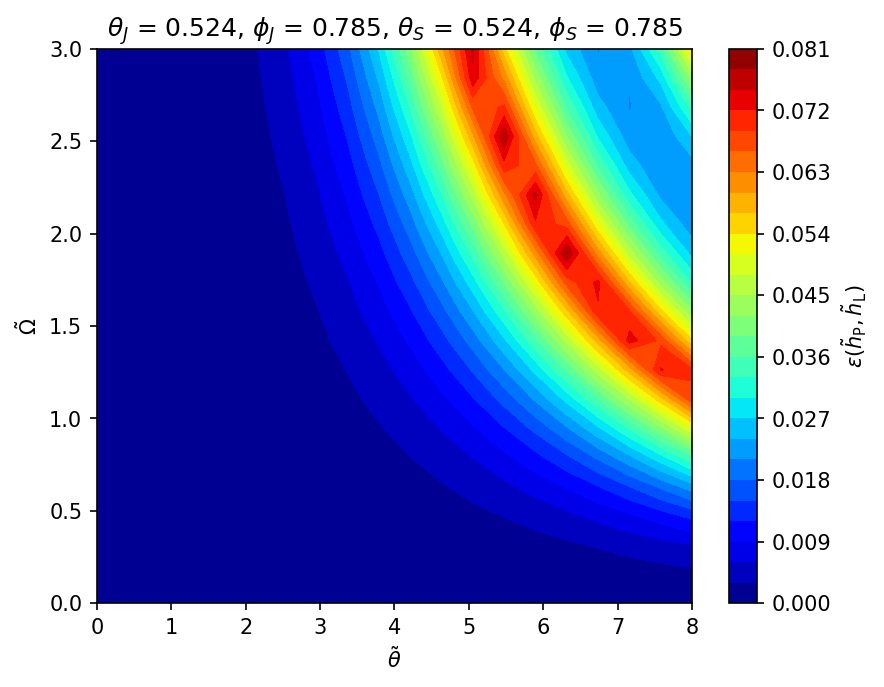

In [23]:
lensing_params, RP_params, NP_params = set_to_params(lensing_params_0, RP_params_0, NP_params_0)

# using Saif's choice of sky locations, set sky location to face-on
theta_J, phi_J = sky_locs_J_S[0]
theta_S, phi_S = sky_locs_S_S[0]
print("inclination cosine = {:.3g}".format(cos_i_JN(phi_J, theta_J, phi_S, theta_S)))

# set lensed, RP, NP to same location
lensing_params['theta_L'] = RP_params['theta_J'] = NP_params['theta_J'] = theta_J
lensing_params['phi_L'] = RP_params['phi_J'] = NP_params['phi_J'] = phi_J
lensing_params['theta_S'] = RP_params['theta_S'] = NP_params['theta_S'] = theta_S
lensing_params['phi_S'] = RP_params['phi_S'] = NP_params['phi_S'] = phi_S

# set mcz for both lensed and RP
mcz = 20
lensing_params['mcz'] = RP_params['mcz'] = NP_params['mcz'] = mcz * solar_mass

mismatch_contour_P(lensing_params, RP_params, NP_params, "RP & NP")

order of arguments: phi_J, theta_J, phi_S, theta_S
inclination cosine = 1
min mismatch = 1.11e-16
min theta_tilde = 0
min omega_tilde = 0
max mismatch = 0.0783
max theta_tilde = 6.32
max omega_tilde = 1.89


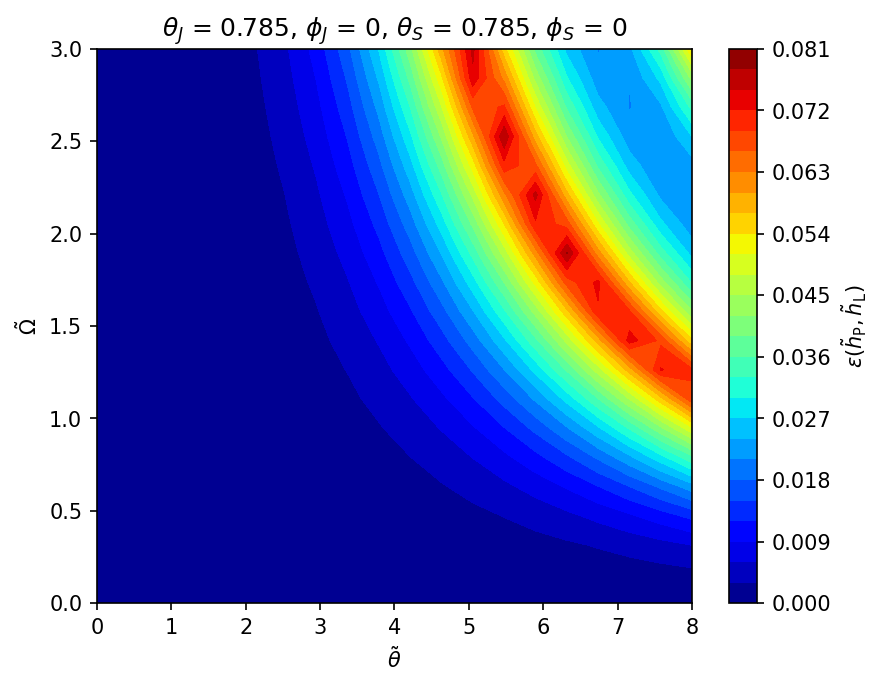

In [24]:
lensing_params, RP_params, NP_params = set_to_params(lensing_params_0, RP_params_0, NP_params_0)

# using Evangelos's choice of sky locations, set sky location to face-on
theta_J, phi_J = sky_locs_J_E[0]
theta_S, phi_S = sky_locs_S_E[0]
print("inclination cosine = {:.3g}".format(cos_i_JN(phi_J, theta_J, phi_S, theta_S)))

# set lensed, RP, NP to same location
lensing_params['theta_L'] = RP_params['theta_J'] = NP_params['theta_J'] = theta_J
lensing_params['phi_L'] = RP_params['phi_J'] = NP_params['phi_J'] = phi_J
lensing_params['theta_S'] = RP_params['theta_S'] = NP_params['theta_S'] = theta_S
lensing_params['phi_S'] = RP_params['phi_S'] = NP_params['phi_S'] = phi_S

# set mcz for both lensed and RP
mcz = 20
lensing_params['mcz'] = RP_params['mcz'] = NP_params['mcz'] = mcz * solar_mass

mismatch_contour_P(lensing_params, RP_params, NP_params, "RP & NP")

## edge-on

order of arguments: phi_J, theta_J, phi_S, theta_S
inclination cosine = 1.11e-16
min mismatch = 0
min theta_tilde = 0
min omega_tilde = 0
max mismatch = 0.167
max theta_tilde = 5.05
max omega_tilde = 3


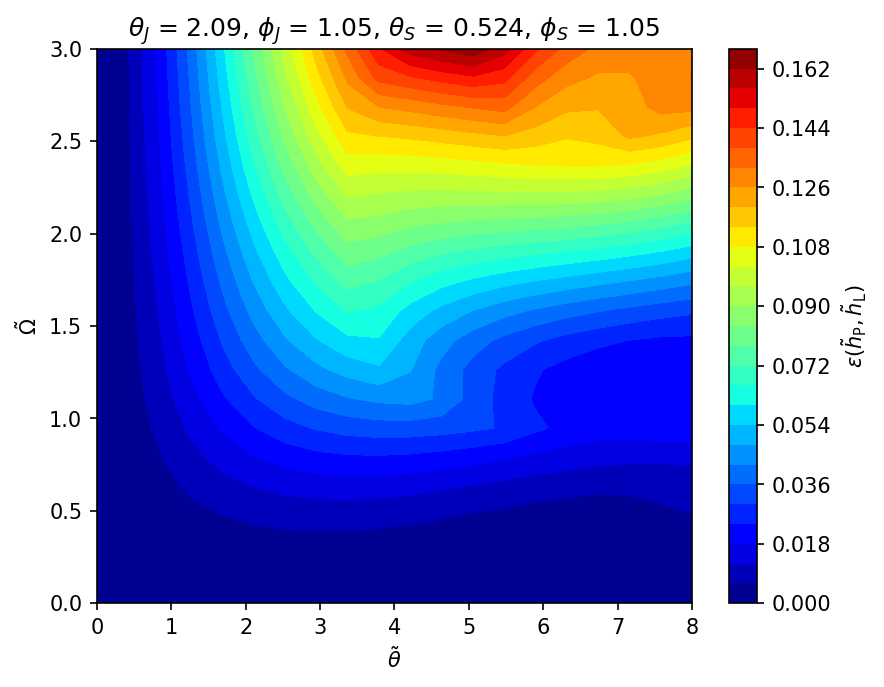

In [25]:
lensing_params, RP_params, NP_params = set_to_params(lensing_params_0, RP_params_0, NP_params_0)

# using Saif's choice of sky locations, set sky location to edge-on
theta_J, phi_J = sky_locs_J_S[1]
theta_S, phi_S = sky_locs_S_S[1]
print("inclination cosine = {:.3g}".format(cos_i_JN(phi_J, theta_J, phi_S, theta_S)))

# set lensed, RP, NP to same location
lensing_params['theta_L'] = RP_params['theta_J'] = NP_params['theta_J'] = theta_J
lensing_params['phi_L'] = RP_params['phi_J'] = NP_params['phi_J'] = phi_J
lensing_params['theta_S'] = RP_params['theta_S'] = NP_params['theta_S'] = theta_S
lensing_params['phi_S'] = RP_params['phi_S'] = NP_params['phi_S'] = phi_S

# set mcz for both lensed and RP
mcz = 20
lensing_params['mcz'] = RP_params['mcz'] = NP_params['mcz'] = mcz * solar_mass

mismatch_contour_P(lensing_params, RP_params, NP_params, "RP & NP")

order of arguments: phi_J, theta_J, phi_S, theta_S
inclination cosine = 8.66e-17
min mismatch = 1.11e-16
min theta_tilde = 0
min omega_tilde = 0
max mismatch = 0.217
max theta_tilde = 8
max omega_tilde = 3


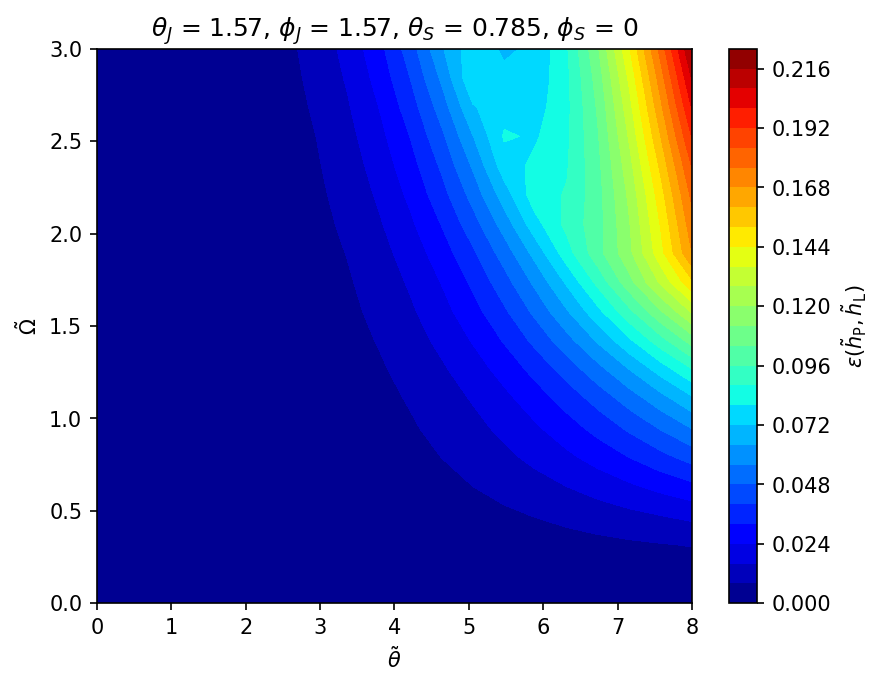

In [26]:
lensing_params, RP_params, NP_params = set_to_params(lensing_params_0, RP_params_0, NP_params_0)

# using Evangelos's choice of sky locations, set sky location to edge-on
theta_J, phi_J = sky_locs_J_E[1]
theta_S, phi_S = sky_locs_S_E[1]
print("inclination cosine = {:.3g}".format(cos_i_JN(phi_J, theta_J, phi_S, theta_S)))

# set lensed, RP, NP to same location
lensing_params['theta_L'] = RP_params['theta_J'] = NP_params['theta_J'] = theta_J
lensing_params['phi_L'] = RP_params['phi_J'] = NP_params['phi_J'] = phi_J
lensing_params['theta_S'] = RP_params['theta_S'] = NP_params['theta_S'] = theta_S
lensing_params['phi_S'] = RP_params['phi_S'] = NP_params['phi_S'] = phi_S

# set mcz for both lensed and RP
mcz = 20
lensing_params['mcz'] = RP_params['mcz'] = NP_params['mcz'] = mcz * solar_mass

mismatch_contour_P(lensing_params, RP_params, NP_params, "RP & NP")

## random

order of arguments: phi_J, theta_J, phi_S, theta_S
inclination cosine = 0.5
min mismatch = 0
min theta_tilde = 0
min omega_tilde = 0
max mismatch = 0.204
max theta_tilde = 8
max omega_tilde = 3


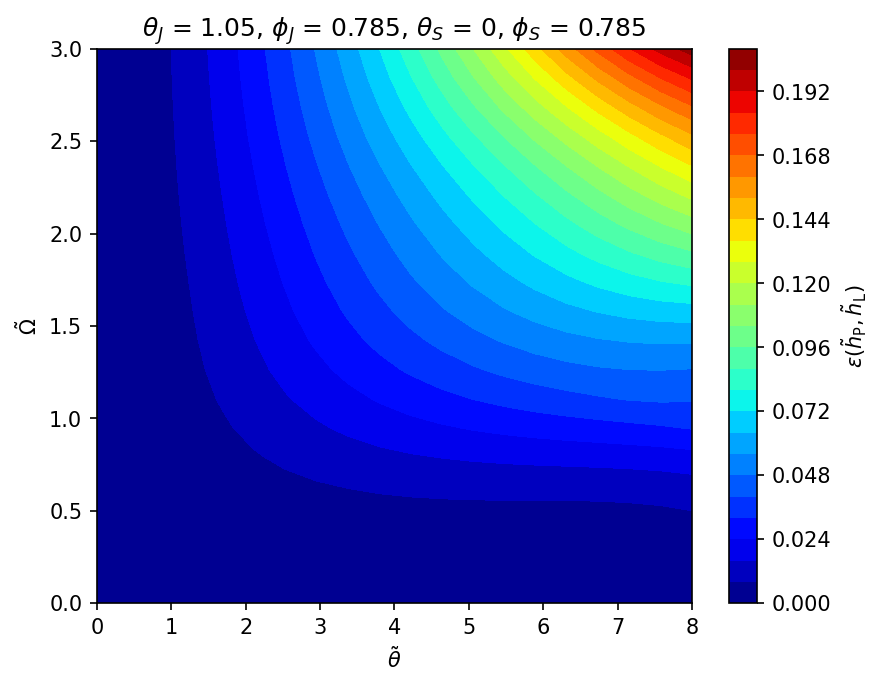

In [27]:
lensing_params, RP_params, NP_params = set_to_params(lensing_params_0, RP_params_0, NP_params_0)

# using Saif's choice of sky locations, set sky location to random
theta_J, phi_J = sky_locs_J_S[2]
theta_S, phi_S = sky_locs_S_S[2]
print("inclination cosine = {:.3g}".format(cos_i_JN(phi_J, theta_J, phi_S, theta_S)))

# set lensed, RP, NP to same location
lensing_params['theta_L'] = RP_params['theta_J'] = NP_params['theta_J'] = theta_J
lensing_params['phi_L'] = RP_params['phi_J'] = NP_params['phi_J'] = phi_J
lensing_params['theta_S'] = RP_params['theta_S'] = NP_params['theta_S'] = theta_S
lensing_params['phi_S'] = RP_params['phi_S'] = NP_params['phi_S'] = phi_S

# set mcz for both lensed and RP
mcz = 20
lensing_params['mcz'] = RP_params['mcz'] = NP_params['mcz'] = mcz * solar_mass

mismatch_contour_P(lensing_params, RP_params, NP_params, "RP & NP")

order of arguments: phi_J, theta_J, phi_S, theta_S
inclination cosine = -0.493
min mismatch = 0
min theta_tilde = 0
min omega_tilde = 0
max mismatch = 0.191
max theta_tilde = 8
max omega_tilde = 3


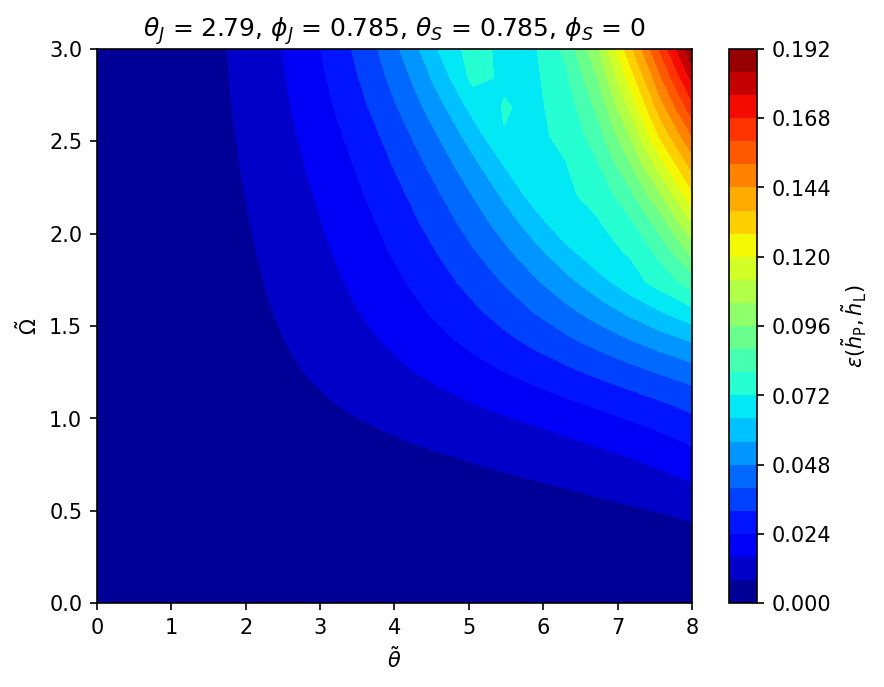

In [28]:
lensing_params, RP_params, NP_params = set_to_params(lensing_params_0, RP_params_0, NP_params_0)

# using Evangelos's choice of sky locations, set sky location to random
theta_J, phi_J = sky_locs_J_E[2]
theta_S, phi_S = sky_locs_S_E[2]
print("inclination cosine = {:.3g}".format(cos_i_JN(phi_J, theta_J, phi_S, theta_S)))

# set lensed, RP, NP to same location
lensing_params['theta_L'] = RP_params['theta_J'] = NP_params['theta_J'] = theta_J
lensing_params['phi_L'] = RP_params['phi_J'] = NP_params['phi_J'] = phi_J
lensing_params['theta_S'] = RP_params['theta_S'] = NP_params['theta_S'] = theta_S
lensing_params['phi_S'] = RP_params['phi_S'] = NP_params['phi_S'] = phi_S

# set mcz for both lensed and RP
mcz = 20
lensing_params['mcz'] = RP_params['mcz'] = NP_params['mcz'] = mcz * solar_mass

mismatch_contour_P(lensing_params, RP_params, NP_params, "RP & NP")

# mismatch between fixed RP & L as a function of $\theta_J$ & $\phi_J$

In [45]:
lensing_params, RP_params, NP_params = set_to_params(lensing_params_0, RP_params_0, NP_params_0)

theta_S, phi_S = sky_locs_S_S[0]

# set lensed, RP, NP to same S location
lensing_params['theta_S'] = RP_params['theta_S'] = NP_params['theta_S'] = theta_S
lensing_params['phi_S'] = RP_params['phi_S'] = NP_params['phi_S'] = phi_S

# set mcz for both lensed and RP
mcz = 20
lensing_params['mcz'] = RP_params['mcz'] = NP_params['mcz'] = mcz * solar_mass

# set RP to 1% in theta_omega_pairs
RP_params['omega_tilde'] = omega_theta_tilde_pairs['05%']['omega_tilde']
RP_params['theta_tilde'] = omega_theta_tilde_pairs['05%']['theta_tilde']

mismatch_contour_J(lensing_params, RP_params, NP_params, "L & RP")
plot_special_coords(phi_S, theta_S)

KeyboardInterrupt: 

(4, 14)
min mismatch = 0.0436
min phi_J = 4.63
min theta_J = 0.661
(12, 16)
max mismatch = 0.253
max phi_J = 5.29
max theta_J = 1.98


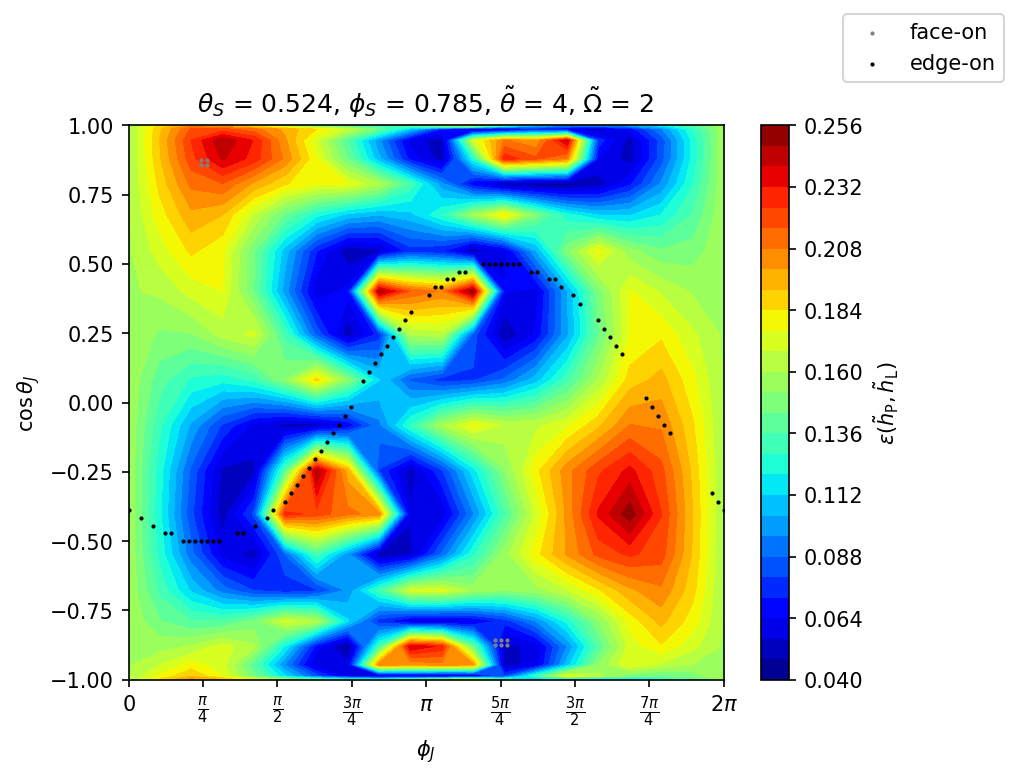

In [43]:
lensing_params, RP_params, NP_params = set_to_params(lensing_params_0, RP_params_0, NP_params_0)

theta_S, phi_S = sky_locs_S_S[0]

# set lensed, RP, NP to same S location
lensing_params['theta_S'] = RP_params['theta_S'] = NP_params['theta_S'] = theta_S
lensing_params['phi_S'] = RP_params['phi_S'] = NP_params['phi_S'] = phi_S

# set mcz for both lensed and RP
mcz = 20
lensing_params['mcz'] = RP_params['mcz'] = NP_params['mcz'] = mcz * solar_mass

# set RP to 50% in theta_omega_pairs
RP_params['omega_tilde'] = omega_theta_tilde_pairs['50%']['omega_tilde']
RP_params['theta_tilde'] = omega_theta_tilde_pairs['50%']['theta_tilde']

mismatch_contour_J(lensing_params, RP_params, NP_params, "L & RP")
plot_special_coords(phi_S, theta_S)

(5, 17)
min mismatch = 0.175
min phi_J = 5.62
min theta_J = 0.827
(6, 10)
max mismatch = 0.376
max phi_J = 3.31
max theta_J = 0.992


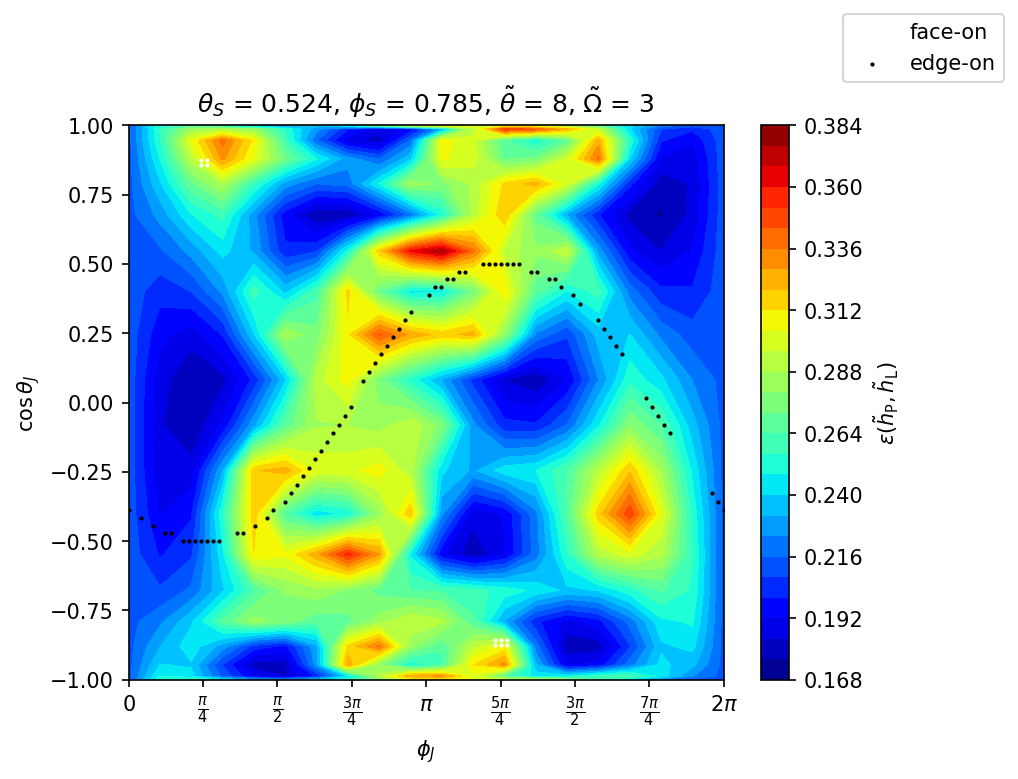

In [49]:
lensing_params, RP_params, NP_params = set_to_params(lensing_params_0, RP_params_0, NP_params_0)

theta_S, phi_S = sky_locs_S_S[0]

# set lensed, RP, NP to same S location
lensing_params['theta_S'] = RP_params['theta_S'] = NP_params['theta_S'] = theta_S
lensing_params['phi_S'] = RP_params['phi_S'] = NP_params['phi_S'] = phi_S

# set mcz for both lensed and RP
mcz = 20
lensing_params['mcz'] = RP_params['mcz'] = NP_params['mcz'] = mcz * solar_mass

# set RP to 95% in theta_omega_pairs
RP_params['omega_tilde'] = omega_theta_tilde_pairs['95%']['omega_tilde']
RP_params['theta_tilde'] = omega_theta_tilde_pairs['95%']['theta_tilde']

mismatch_contour_J(lensing_params, RP_params, NP_params, "L & RP")
plot_special_coords(phi_S, theta_S)